<a href="https://colab.research.google.com/github/NickolosZH/study/blob/main/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D1%81%D0%B5%D1%82%D0%B8_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеку
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Задаём активационную функцию

# Вариант 1
# def fn_act(x):
#     return 0 if x < 0.5 else 1

# Вариант 2
def sigmoid(x):  # f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

In [ ]:
# Считаем производную сигмоиды f'(x) = f(x) * (1 - f(x))
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

In [ ]:
# Считаем ошибку
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Для классификации использовать Binary_Crossentropy

In [ ]:
# Решение с использованием классов и методов

class Neural_network:
    '''
    Нейронная сеть с:
    - 3 входами
    - скрытым слоем с 2 нейронами
    - выходным слоем с 1 нейроном
    '''

    # Устанавливаем начальные значения весов (weights)
    def __init__(self):
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        self.w7 = np.random.normal()
        self.w8 = np.random.normal()

        # Устанавливаем начальные значения смещений (bias)
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # Формула прямого прохода
        # h1, h2 - результаты на 1 и 2 скрытых нейронах, x - вектор из входных нейронов
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.w3 * x[2] + self.b1)
        h2 = sigmoid(self.w4 * x[0] + self.w5 * x[1] + self.w6 * x[2] + self.b2)

        # o1 - результат на выходном нейроне
        o1 = sigmoid(self.w7 * h1 + self.w8 * h2 + self.b3)

        return o1

    def train(self, data, y_trues):
        '''
        - data - массив numpy (n x 3) с 3 наблюдениями в наборе
        - y_trues - верные ответы, соответствующие наблюдениям в data

        '''
        learn_rate = 0.1  # Скорость обучения
        epochs = 10000
        losses = []

        for epoch in range(epochs):
            for x, y_true in zip(data, y_trues):
                # Считаем результаты прямого прохода
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.w3 * x[2] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w4 * x[0] + self.w5 * x[1] + self.w6 * x[2] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w7 * h1 + self.w8 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                ## Считаем частные производные. (dl_dw1 - частная производная l по w1)
                dL_y_pred = -2 * (y_true - y_pred)

                # Нейрон o1
                dypred_w7 = h1 * deriv_sigmoid(sum_o1)
                dypred_w8 = h2 * deriv_sigmoid(sum_o1)
                dypred_b3 = deriv_sigmoid(sum_o1)

                dypred_h1 = self.w7 * deriv_sigmoid(sum_o1)
                dypred_h2 = self.w8 * deriv_sigmoid(sum_o1)

                # Нейрон h1
                dypred_w1 = x[0] * deriv_sigmoid(sum_h1)
                dypred_w2 = x[1] * deriv_sigmoid(sum_h1)
                dypred_w3 = x[2] * deriv_sigmoid(sum_h1)
                dypred_b1 = deriv_sigmoid(sum_h1)

                # Нейрон h2
                dypred_w4 = x[0] * deriv_sigmoid(sum_h2)
                dypred_w5 = x[1] * deriv_sigmoid(sum_h2)
                dypred_w6 = x[2] * deriv_sigmoid(sum_h2)
                dypred_b2 = deriv_sigmoid(sum_h2)

                ## Обновляем веса и пороги
                # Нейрон h1
                self.w1 -= learn_rate * dL_y_pred * dypred_h1 * dypred_w1
                self.w2 -= learn_rate * dL_y_pred * dypred_h1 * dypred_w2
                self.w3 -= learn_rate * dL_y_pred * dypred_h1 * dypred_w3
                self.b1 -= learn_rate * dL_y_pred * dypred_h1 * dypred_b1

                # Нейрон h2
                self.w4 -= learn_rate * dL_y_pred * dypred_h2 * dypred_w4
                self.w5 -= learn_rate * dL_y_pred * dypred_h2 * dypred_w5
                self.w6 -= learn_rate * dL_y_pred * dypred_h2 * dypred_w6
                self.b2 -= learn_rate * dL_y_pred * dypred_h2 * dypred_b2

                # Нейрон o1
                self.w7 -= learn_rate * dL_y_pred * dypred_w7
                self.w8 -= learn_rate * dL_y_pred * dypred_w8
                self.b3 -= learn_rate * dL_y_pred * dypred_b3

            ## Считаем полные потери в конце каждой 10 эпохи
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))
            
            losses.append(loss)
        plt.plot(losses, 
        label='Изменение ошибки')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Ошибка')
        plt.legend()
        plt.show()

In [ ]:
# Определим набор данных
data = np.array([
    [1, 1, 0], # Вася
    [1, 0, 1], # Сергей
    [1, 0, 0], # Лёша
    [0, 0, 1], # Костя
    [1, 1, 1], # Степан
])

# Правильные ответы
y_trues = np.array([
    1, # Вася
    1, # Сергей
    0, # Лёша
    0, # Костя
    1, # Степан
])

Epoch 0 loss: 0.354
Epoch 10 loss: 0.282
Epoch 20 loss: 0.252
Epoch 30 loss: 0.240
Epoch 40 loss: 0.232
Epoch 50 loss: 0.225
Epoch 60 loss: 0.218
Epoch 70 loss: 0.212
Epoch 80 loss: 0.205
Epoch 90 loss: 0.199
Epoch 100 loss: 0.194
Epoch 110 loss: 0.188
Epoch 120 loss: 0.183
Epoch 130 loss: 0.178
Epoch 140 loss: 0.173
Epoch 150 loss: 0.169
Epoch 160 loss: 0.164
Epoch 170 loss: 0.160
Epoch 180 loss: 0.156
Epoch 190 loss: 0.152
Epoch 200 loss: 0.147
Epoch 210 loss: 0.143
Epoch 220 loss: 0.138
Epoch 230 loss: 0.133
Epoch 240 loss: 0.128
Epoch 250 loss: 0.123
Epoch 260 loss: 0.118
Epoch 270 loss: 0.112
Epoch 280 loss: 0.107
Epoch 290 loss: 0.101
Epoch 300 loss: 0.095
Epoch 310 loss: 0.090
Epoch 320 loss: 0.085
Epoch 330 loss: 0.079
Epoch 340 loss: 0.075
Epoch 350 loss: 0.070
Epoch 360 loss: 0.066
Epoch 370 loss: 0.062
Epoch 380 loss: 0.058
Epoch 390 loss: 0.054
Epoch 400 loss: 0.051
Epoch 410 loss: 0.048
Epoch 420 loss: 0.045
Epoch 430 loss: 0.043
Epoch 440 loss: 0.040
Epoch 450 loss: 0.038

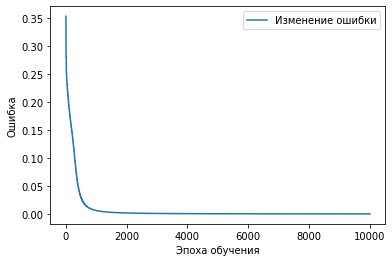

In [ ]:
# Обучаем нейронную сеть
network = Neural_network()
network.train(data, y_trues)

In [ ]:
# Делаем пару предсказаний
stanislav = np.array([0, 0, 0])
egor = np.array([1, 1, 0])

print(network.feedforward(stanislav))
print(network.feedforward(egor))

0.0007453591540486889
0.9883536177198384
